# Bank Marketing

In this dataset, we will use basic data analysis using python libraries such as Pandas and Sklearn We will also run Naive Bayes and Decision Tree algorithms before and after feature engineering to compare each of them.

1 – **Age**: Age of the customer (numeric).

2 - **Job**: Type of job (qualitative).

3 - **Marital**: Marital status (qualitative).

4 – **Education**: Education of the customer (qualitative).

5 - **Default**: Shows whether the customer has credit in default or not (qualitative). 

6 - **Balance**: Average yearly balance in Euros (numeric).

7 - **Housing**: Shows whether the customer has housing loan or not (qualitative).

8 - **Loan**: Shows whether the customer has personal loan or not (qualitative/categorical).

9 - **Contact**: Shows how the last contact for marketing campaign has been made (qualitative)

10 - **Day**: Shows on which day of the month last time customer was contacted (numeric). 

11 - **Month**: Shows on which month of the year last time customer was contacted (qualitative).

12 - **Duration**: Shows the last contact duration in seconds (numeric).

13 - **Campaign**: Number of contacts performed during the marketing campaign and for this customer (numeric).

14 - **Pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).

15 - **Previous**: Number of contacts performed before this campaign and for this client (numeric).

16 – **Poutcome**: Outcome of the previous marketing campaign (qualitative).

17 - **y**: People with subscription to term deposit are represented by yes and people with no subscription to the term deposit will be reported by no.

The purpose of this assignment is to compare both machine learning models in a complete and selective state, and to see the changes that could be made when tuning a model.

## Data Exploration:

In [274]:
import pandas as pd 
import numpy as np

# importing the dataset:
data = pd.read_csv("/Users/azamrahman/Desktop/Projects/Python Projects/Bank Marketing - (Decision Trees and Naive Bayes)/bank.csv")

df = data.copy()

# Looking at the data types
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


Out of the 17 attributes: 7 of them are "int64" while 10, including the target variable, are "objects.

In [275]:
# displaying first 10 records 
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [276]:
# looking at column information about the data, such as null values, non-null values, and type of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In this dataset, there are no missing values present.

In [277]:
# Let's see the information about numeric data, we can also see if there any extreme values
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


We can see that there are extreme values present in balance, duration, campaign, pdays, and previous.

## Data Preparation: Categorical to One-Hot (numeric) Encoding

We will create on-hot-encoding of categorical variables using dummy variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features.

In [278]:
# Columns of all categorical variables:
cat_cols=["job","marital","education","default","housing","loan","contact","month","poutcome"]

In [279]:
# Creating a copy of the dataframe
df_onehot=df.copy()
# Converting  categorical variables to dummy variables to complete encoding
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)

df_onehot

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,no,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,no,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,no,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,no,0,1,...,0,0,0,0,0,0,0,1,0,0


We have successfully completed the encoding of categorical variables. As you can see, all categories of a variable are now a seperate variable. We do have an issue of certain variables with negative values that will not work with Naive Bayes.

In [280]:
int_col = []
for col in df_onehot.columns:
    if df_onehot[col].dtype == 'int':
        int_col.append(col)

int_df = df_onehot[int_col]

int_df.columns[(int_df < 0).any()].tolist()

['balance', 'pdays']

We can see here that there are only 2 variables that contain negative values: 'balance' and 'pdays'. For the sake of simplicity, we will change all negative values to 0, this change will also be present in the Decision Tree model.

In [281]:
df_onehot["pdays"]=df_onehot["pdays"].apply(lambda x: 0 if x<0 else x)

df_onehot["balance"]=df_onehot["balance"].apply(lambda x: 0 if x<0 else x)

## Predictive Modeling (Naive Bayes Complete):

Splitting the dataset into Train and Test sets:

In [282]:
#train test set split
from sklearn.model_selection import train_test_split

class_col_name="y"

one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109)

In [283]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

Here we are implementing the Naive Bayes model to the train sets, then using the X_test set to create the predictions.

In [284]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  51
Classes  ['no' 'yes']
Number of records for classes  [2812.  352.]
Log prior probability for classes  [-0.11794108 -2.19596115]
Log conditional probability for each feature given a class
 [[ -3.77699969  -0.20579945  -4.7182279   -2.06172295  -6.45024974
   -3.9085675   -8.26762713  -9.73706738  -9.01080459 -10.71230065
  -11.21129181  -9.0557747  -10.57876926 -10.68586739  -9.83608814
  -11.6931299   -9.228264   -11.10006618 -12.33975707  -9.65624797
   -7.95773043  -8.83365382  -9.36469143  -8.14597861  -8.72638516
  -10.72126932  -7.50528054 -11.58065192  -8.38154468  -8.01502254
   -7.66820347  -9.29307247  -7.97550103 -10.22131337  -8.62507697
  -10.27174422  -9.48537891 -13.23357494 -10.60248578 -10.87692263
   -9.28876211  -9.63778591 -12.38627708  -8.60208745  -9.88953597
  -12.13496265 -12.48636054  -9.73706738 -10.71230065 -12.06350369
   -7.65678444]
 [ -4.01881151  -0.35254039  -5.00044473  -1.43329375  -6.90624091
   -3.55629465  -7.69253715  -9

In [285]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[516 672]
 [ 46 123]]
TP:  123 , FP:  672 , TN:  516 , FN: 46


We can see here that the complete Naive Bayes Model has trouble correctly predicting the True Positives as the Confusion Matrix shows that the False Positives severely outweighs the True Positives. On the other hand, the model was able to predict True Negatives very well.

In [286]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.43      0.59      1188
         yes       0.15      0.73      0.26       169

    accuracy                           0.47      1357
   macro avg       0.54      0.58      0.42      1357
weighted avg       0.82      0.47      0.55      1357



The precision of "no" and "yes" classes are completely opposites. This may be possible because the dataset could be imbalanced in terms of having enough data when "y" = "yes" vs. "no". As expected, the accuracy of the model hits 47% showing that the model is inadequate of making accurate predictions.

## Predictive Modeling (Decision Tree Complete Model):

class Names ['no' 'yes']


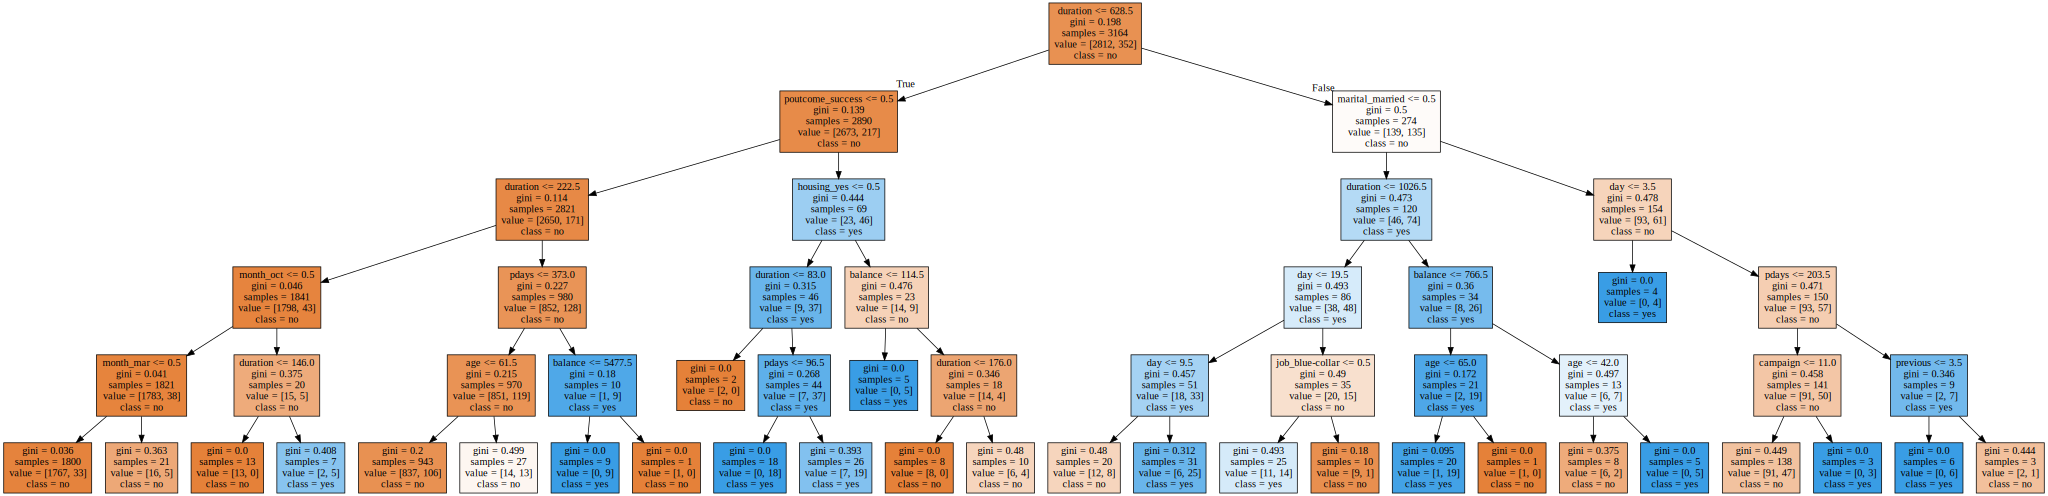

In [287]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [288]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [289]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1188
         yes       0.60      0.30      0.40       169

    accuracy                           0.89      1357
   macro avg       0.75      0.63      0.67      1357
weighted avg       0.87      0.89      0.87      1357



The complete Decision Tree model shows to be a very accurate predictor with an accuracy of 89%. However, we are still having an issue where the model is having trouble predicting "Yes" classes as precision, recall, and f1-scores and still very low. Again, it could be due to class imbalance.

## Feature Selection for Selective Model:

In [290]:
print(one_hot_feature_names)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [291]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, one_hot_feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. duration (0.042152)
2. pdays (0.007369)
3. month_oct (0.000884)
4. age (0.000295)
5. campaign (0.000295)
6. loan_no (0.000147)
7. poutcome_success (0.000147)
8. contact_unknown (0.000147)
9. month_mar (0.000000)
10. job_student (0.000000)
11. marital_married (0.000000)
12. marital_single (0.000000)
13. job_unemployed (0.000000)
14. job_technician (0.000000)
15. education_tertiary (0.000000)
16. month_nov (0.000000)
17. default_no (0.000000)
18. default_yes (0.000000)
19. housing_no (0.000000)
20. marital_divorced (0.000000)
21. job_services (0.000000)
22. contact_cellular (0.000000)
23. contact_telephone (0.000000)
24. job_unknown (0.000000)
25. month_apr (0.000000)
26. month_aug (0.000000)
27. month_dec (0.000000)
28. job_self-employed (0.000000)
29. job_retired (0.000000)
30. job_housemaid (0.000000)
31. job_entrepreneur (-0.000147)
32. job_admin. (-0.000147)
33. education_unknown (-0.000147)
34. month_jun (-0.000147)
35. month_jan (-0.000147)
36. education_primar

Using Sklearn's Variable Importance test, we can see that there are many attributes that may hurt or contribute nothing to the model. Therefore, I decided to use the top 5 variables for the selective models.

In [292]:
new_df_onehot = df_onehot[['duration','pdays','month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'age','contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y']].copy()
new_df_onehot.head()

,duration,pdays,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,...,month_sep,age,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,79,0,0,0,0,0,0,0,0,0,...,0,30,1,0,0,0,0,0,1,no
1,220,339,0,0,0,0,0,0,0,0,...,0,33,1,0,0,1,0,0,0,no
2,185,330,1,0,0,0,0,0,0,0,...,0,35,1,0,0,1,0,0,0,no
3,199,0,0,0,0,0,0,0,1,0,...,0,30,0,0,1,0,0,0,1,no
4,226,0,0,0,0,0,0,0,0,0,...,0,59,0,0,1,0,0,0,1,no


We created a new dataset with the selected variables. Keep in mind that I chose the top 5 variable, but this includes all dummy variables that belong to it. For example, if contact_cellular was in the top 5, then contact_telephone will also be included since in reality it is part of the same variable. It wouldn't make sense to me to break it since it initially was together in the same column.

## Predictive Modeling (Naive Bayes Selective Model):

In [293]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
#class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=new_df_onehot.columns[new_df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(new_df_onehot.loc[:, one_hot_feature_names], new_df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [294]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

Let's look at Naive Bayes output

In [295]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  22
Classes  ['no' 'yes']
Number of records for classes  [2812.  352.]
Log prior probability for classes  [-0.11794108 -2.19596115]
Log conditional probability for each feature given a class
 [[ -0.3007421   -2.14758664  -8.51076337  -7.72439806 -11.47259409
   -8.84150493  -9.11594178  -7.52778126  -7.87680506 -10.62529623
   -6.8411066   -8.12855512 -10.3739818  -10.72537969  -2.01601884
   -6.21452018  -8.46033252  -6.86409611  -7.97608653  -8.9513198
  -10.30252284  -5.89580359]
 [ -0.18269999  -2.30570088  -8.71591794  -8.42823587 -10.18225501
   -9.04727507  -9.89457294  -8.5728171   -8.79596065  -9.74042226
   -8.17478697  -9.16060376  -9.20142575  -9.81453023  -2.76821774
   -6.74112492  -9.01218375  -8.5728171   -8.69060013  -9.04727507
   -8.40918767  -6.91989407]]


We have probailities of a lot more features now.

See evaluation metrics below.

In [296]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[930 258]
 [ 79  90]]
TP:  90 , FP:  258 , TN:  930 , FN: 79


For the selective Naive Bayes model, we can see little improvement for predicting the True Positives. True Negatives are still predicted very well.

In [297]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.78      0.85      1188
         yes       0.26      0.53      0.35       169

    accuracy                           0.75      1357
   macro avg       0.59      0.66      0.60      1357
weighted avg       0.84      0.75      0.78      1357



When comparing the complete and selective model, we can see an increase of accuracy from 47% to 75%. Again, the model still struggles to accurately predict "yes" classes but has improved slightly.

## Predictive Modeling (Decision Tree Selective Model):

**Let's run decision tree on one-hot encoded data**

class Names ['no' 'yes']


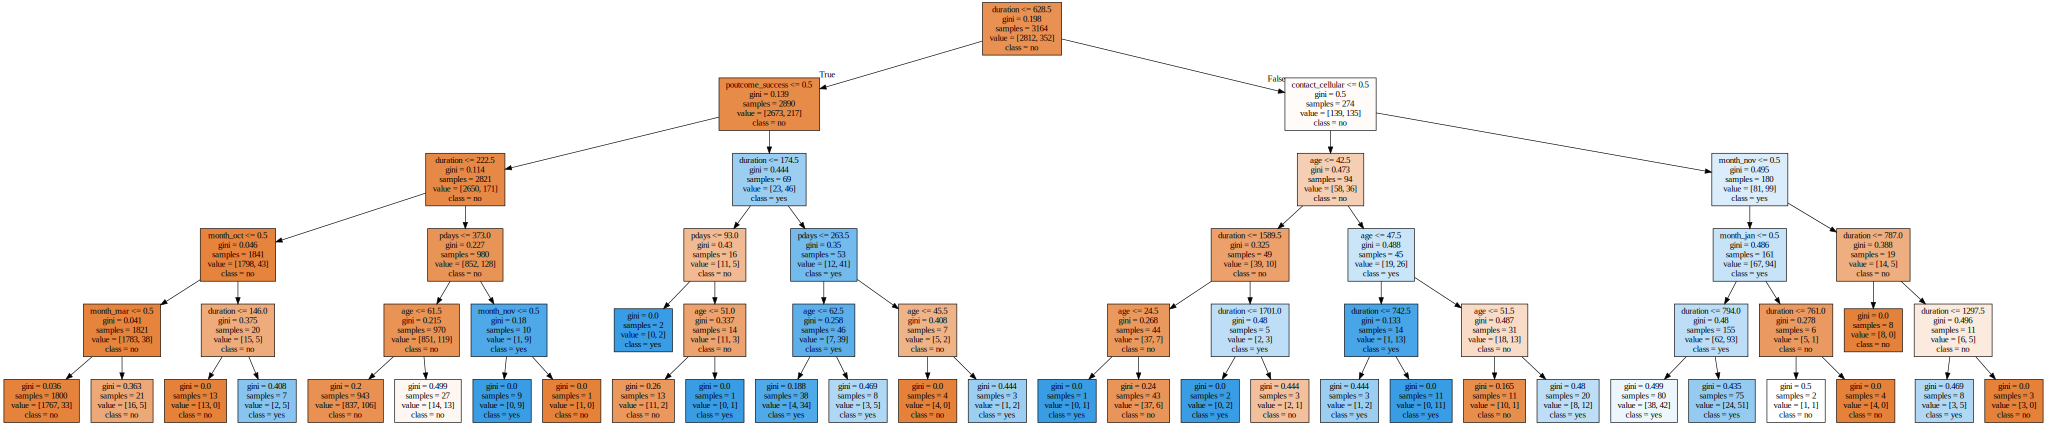

In [298]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=new_df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=new_one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [299]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [300]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.96      0.94      1188
         yes       0.55      0.38      0.45       169

    accuracy                           0.88      1357
   macro avg       0.73      0.67      0.69      1357
weighted avg       0.87      0.88      0.88      1357



When comparing the Complete vs Selective model for Decision Trees, we can see that the accuracy actually decrease by 1% which is very interesting to see. The selective model had more trouble predicting "yes" classes than the Complete model. It is possible that the Decision Tree algorithm has possibly maximized its predicting ability and cannot further improve unless classes are balanced or data is further cleaned.

## Conclusion & Findings:

It was very interesting to see how both machine-learning algorithms react to feature selections when comparing their complete models with their selectives. When comparing the Decision Tree models, I noticed that selecting features does not have a significant impact on how the model performs. The decision tree algorithm is very simple to the point that it would use those additional variables to increase the decision tree size which can lead to an increase of accuracy. However, a more complex decision tree can lead to overfitting very easily, so it is important to prune the tree so that it will not be so sensitive to awkward data.

It was also very interesting to see how sensitive the Naive Bayes Model when selecting attributes. We saw a 28% increase when strategically selecting the attributes. It is shown that Naive Bayes works much better when implementing additional methods to properly select attributes. We can customize this model a lot more based on more analysis. We also know that Naive Bayes generally works a lot better with smaller amounts of data as it uses probabilities to properly predict the class. 

I am curious to see how both models react to data class balancing and further data cleaning methods to see how much of a difference it would make to their performance measures.

For the bank marketing dataset, It is clear that the Complete Decision Tree model was the best predictor of whether or not customers would subscribe to a term deposit or not.

